In [138]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [139]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [140]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.cluster import DBSCAN
from collections import Counter
from geopy.distance import geodesic
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [141]:
# taking the csv file
orders_data = 'zomato.csv'

In [142]:
# reading the csv file
data = pd.read_csv(orders_data)

In [143]:
data.head(5)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [144]:
unique_data = data.drop_duplicates(subset=['address'])

In [145]:
len(unique_data)

11495

In [146]:
cleared_data = unique_data.dropna()

In [147]:
len(cleared_data)

4230

In [148]:
# information about the dataset
cleared_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4230 entries, 0 to 51677
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          4230 non-null   object
 1   address                      4230 non-null   object
 2   name                         4230 non-null   object
 3   online_order                 4230 non-null   object
 4   book_table                   4230 non-null   object
 5   rate                         4230 non-null   object
 6   votes                        4230 non-null   int64 
 7   phone                        4230 non-null   object
 8   location                     4230 non-null   object
 9   rest_type                    4230 non-null   object
 10  dish_liked                   4230 non-null   object
 11  cuisines                     4230 non-null   object
 12  approx_cost(for two people)  4230 non-null   object
 13  reviews_list                 4230 non

In [149]:
# we are not considering the 'review_list' is because we already have the rate
cleared_data.drop(['url','phone','reviews_list'],axis=1,inplace=True)

In [150]:
#checking duplicate value
cleared_data.duplicated().sum()

0

In [151]:
#missing values count
cleared_data.isnull().sum()

address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [152]:
#downloading it to the csv format
cleared_data.to_csv('cleared_zomato_data.csv')

In [153]:
# laoding the food truck data
food_truck_data = pd.read_csv('food_truck_data.csv')

In [154]:
len(food_truck_data)

51651

In [155]:
merged_data = pd.merge(cleared_data,food_truck_data, on='address')

In [156]:
len(merged_data)

23458

In [157]:
uni_merged_data = merged_data.drop_duplicates()

In [158]:
cleaned_uni_merged_data=uni_merged_data.dropna()

In [159]:
cleaned_uni_merged_data.to_csv('cleaned_final_dataset.csv')

In [160]:
data = cleaned_uni_merged_data

In [161]:
#renaming the columns

# changing the column names into simpler names
data=data.rename(columns={'approx_cost(for two people)':'approx_cost','listed_in(type)':'res_type','listed_in(city)':'res_city'})

# viewing the column names after renaming the column names
data.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines', 'approx_cost',
       'menu_item', 'res_type', 'res_city', 'latitude', 'longitude'],
      dtype='object')

In [162]:
# as the rate column is in the format of the object converting it into the float variable

# finding the unique rate present in the dataset

data['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', 'NEW', '2.4/5', '2.2/5', '2.3/5',
       '4.8/5', '3.9 /5', '2.9 /5', '4.2 /5', '4.1 /5', '2.7 /5',
       '4.3 /5', '4.9/5', '2.1/5', '2.0/5', '4.4 /5', '4.5 /5', '1.8/5',
       '4.0 /5', '3.3 /5', '3.7 /5', '4.6 /5', '3.1 /5', '3.4 /5',
       '3.6 /5', '3.0 /5', '2.6 /5', '3.2 /5', '3.5 /5', '2.8 /5',
       '4.7 /5', '4.8 /5', '4.9 /5', '2.4 /5', '2.3 /5', '2.5 /5',
       '2.0 /5'], dtype=object)

In [163]:
# As you see above we have 'NEW', '-' as the values, so we are removing it

data = data.loc[(data.rate!='NEW') & (data.rate!="-")].reset_index(drop=True)

In [164]:
data['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5', '4.8/5',
       '3.9 /5', '2.9 /5', '4.2 /5', '4.1 /5', '2.7 /5', '4.3 /5',
       '4.9/5', '2.1/5', '2.0/5', '4.4 /5', '4.5 /5', '1.8/5', '4.0 /5',
       '3.3 /5', '3.7 /5', '4.6 /5', '3.1 /5', '3.4 /5', '3.6 /5',
       '3.0 /5', '2.6 /5', '3.2 /5', '3.5 /5', '2.8 /5', '4.7 /5',
       '4.8 /5', '4.9 /5', '2.4 /5', '2.3 /5', '2.5 /5', '2.0 /5'],
      dtype=object)

In [165]:
# removing the '/5' from the rate

def remove_slash(x):
    if isinstance(x,str):
        return x.replace('/5','')
    else:
        return x

In [166]:
# Applying the function to the 'rate' column

data['rate'] = [remove_slash(x) for x in data['rate']]

In [167]:
data['rate'].unique()

array(['4.1', '3.8', '3.7', '4.6', '4.0', '4.2', '3.9', '3.0', '3.6',
       '2.8', '4.4', '3.1', '4.3', '2.6', '3.3', '3.5', '3.8 ', '3.2',
       '4.5', '2.5', '2.9', '3.4', '2.7', '4.7', '2.4', '2.2', '2.3',
       '4.8', '3.9 ', '2.9 ', '4.2 ', '4.1 ', '2.7 ', '4.3 ', '4.9',
       '2.1', '2.0', '4.4 ', '4.5 ', '1.8', '4.0 ', '3.3 ', '3.7 ',
       '4.6 ', '3.1 ', '3.4 ', '3.6 ', '3.0 ', '2.6 ', '3.2 ', '3.5 ',
       '2.8 ', '4.7 ', '4.8 ', '4.9 ', '2.4 ', '2.3 ', '2.5 ', '2.0 '],
      dtype=object)

In [168]:
# converting the 'rate' column into the float column

data['rate'] = data['rate'].astype('float')

In [169]:
data['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [170]:
# As the approx_cost is in the object format converting it into the float

# finding the unique
data['approx_cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '750', '200', '850', '1,200', '150', '350', '250', '1,500',
       '1,300', '1,000', '100', '900', '1,100', '1,600', '950', '230',
       '1,350', '1,700', '2,200', '1,400', '2,000', '1,800', '1,900',
       '180', '330', '2,100', '3,000', '2,800', '2,500', '3,400', '40',
       '1,250', '2,400', '1,450', '3,500', '1,050', '4,100', '2,300',
       '120', '2,600', '1,650', '2,700'], dtype=object)

In [171]:
#Transformation of the varibles from str to the float

# replacing the ',' with empty ''
data['approx_cost'] = data['approx_cost'].apply(lambda x: x.replace(',','')) #Using lambda function to replace ',' from cost

# converting it into the float
data['approx_cost'] = data['approx_cost'].astype(float)

In [172]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4181 entries, 0 to 4180
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       4181 non-null   object 
 1   name          4181 non-null   object 
 2   online_order  4181 non-null   object 
 3   book_table    4181 non-null   object 
 4   rate          4181 non-null   float64
 5   votes         4181 non-null   int64  
 6   location      4181 non-null   object 
 7   rest_type     4181 non-null   object 
 8   dish_liked    4181 non-null   object 
 9   cuisines      4181 non-null   object 
 10  approx_cost   4181 non-null   float64
 11  menu_item     4181 non-null   object 
 12  res_type      4181 non-null   object 
 13  res_city      4181 non-null   object 
 14  latitude      4181 non-null   float64
 15  longitude     4181 non-null   float64
dtypes: float64(4), int64(1), object(11)
memory usage: 522.8+ KB


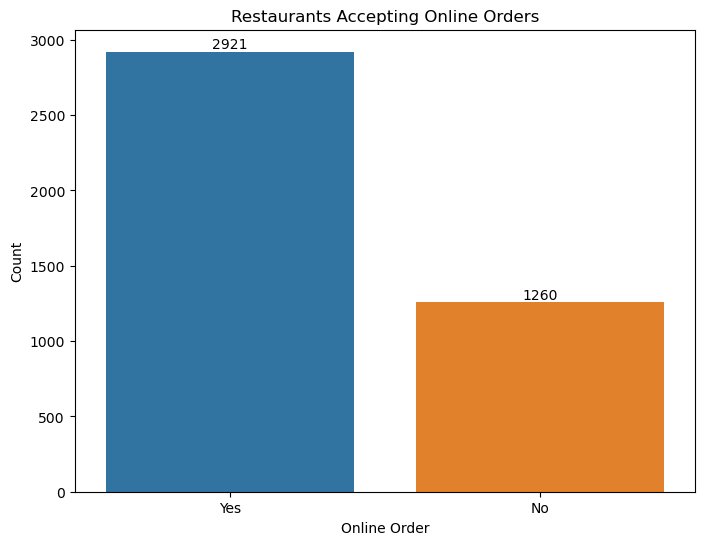

In [173]:
# Count plot for Restaurants Accepting Online Orders

plt.figure(figsize=(8,6))
graph = sns.countplot(x='online_order', data = data)
plt.title('Restaurants Accepting Online Orders')
plt.xlabel('Online Order')
plt.ylabel('Count')

for p in graph.patches:
    graph.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    
plt.show()

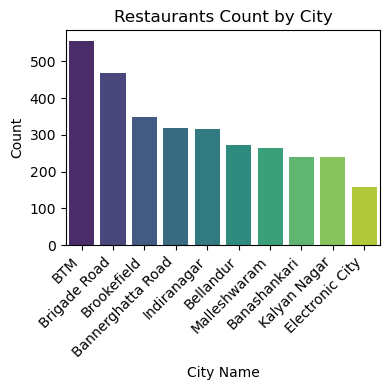

In [174]:
# Group and count
restaurant_counts = data['res_city'].value_counts()

# Select the top N restaurants (e.g., top 10)
top_n = 10
top_restaurants = restaurant_counts.nlargest(top_n)

# Create a bar plot
plt.figure(figsize=(4, 4))
sns.barplot(x=top_restaurants.index, y=top_restaurants.values, palette='viridis')
plt.title(f"Restaurants Count by City")
plt.xlabel("City Name")
plt.ylabel("Count")

# Rotate x-axis labels for clarity
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


In [175]:
len(data['res_city'].unique())

30

In [176]:
unique_city_count = data.groupby('res_city').size().reset_index(name='count')

In [177]:
print(unique_city_count)

                 res_city  count
0                     BTM    556
1            Banashankari    241
2       Bannerghatta Road    319
3            Basavanagudi    136
4               Bellandur    273
5            Brigade Road    469
6             Brookefield    348
7           Church Street     32
8         Electronic City    157
9             Frazer Town     98
10                    HSR    117
11            Indiranagar    315
12               JP Nagar     16
13              Jayanagar     49
14           Kalyan Nagar    241
15           Kammanahalli      8
16  Koramangala 4th Block     85
17  Koramangala 5th Block      9
18  Koramangala 6th Block      5
19  Koramangala 7th Block      6
20           Lavelle Road     30
21                MG Road      5
22           Malleshwaram    263
23           Marathahalli     97
24           New BEL Road     80
25       Old Airport Road     18
26            Rajajinagar     53
27         Residency Road      1
28          Sarjapur Road     22
29        

In [179]:
# Based on the above restaurants by city count, choosing the top 10 city latitude and longitude details

# Example custom coordinates
custom_locations = [
    {"name": "Brigade Road", "latitude":12.9706 , "longitude": 77.60024},
    {"name": "BTM","latitude":12.912812 , "longitude":77.609219},
    {"name": "Brookefield","latitude":12.973864 , "longitude":77.713768},
    {"name": "Bannerghatta Road","latitude":12.891331 , "longitude": 77.598335},
    {"name": "Indiranagar","latitude":12.971891 , "longitude":77.641151},
    {"name": "Bellandur","latitude":12.937562 , "longitude":77.670097},
    {"name": "Malleshwaram","latitude":13.0084296 , "longitude":77.5705282},
    {"name": "Banashankari","latitude":12.925453 , "longitude":77.546761},
    {"name": "Kalyan Nagar","latitude":13.028005 , "longitude":77.639969},
    {"name": "Electronic City","latitude": 12.840711, "longitude":77.676369}
]
locations_df = pd.DataFrame(custom_locations)

In [180]:
# Define a function to find restaurants within a certain radius
def find_restaurants_within_radius(df, center, radius_km):
    def is_within_radius(row):
        return geodesic((row['latitude'], row['longitude']), center).km <= radius_km
    return df[df.apply(is_within_radius, axis=1)]

In [261]:
radius_km = 1.5
all_restaurants_within_radius_list = []
restaurants_within_radius_list = []

# Iterate over each custom location and find restaurants within the radius
for location in custom_locations:
    center = (location['latitude'], location['longitude'])
    restaurants_in_radius = find_restaurants_within_radius(data, center, radius_km)
    all_restaurants_within_radius_list.append(restaurants_in_radius)
    lat_lon_list = restaurants_in_radius[['latitude', 'longitude']].values.tolist()
    restaurants_within_radius_list.append(lat_lon_list)

In [195]:
def generate_circle_points(lat, lon, radius_km, num_points=100):
    radius_deg = radius_km / 111.32  # Convert radius to degrees (approx)
    angles = np.linspace(0, 2 * np.pi, num_points)
    latitudes = lat + radius_deg * np.cos(angles)
    longitudes = lon + radius_deg * np.sin(angles)
    return latitudes, longitudes

In [213]:
coords = data_map[['latitude', 'longitude']].values
db = DBSCAN(eps=0.0001, min_samples=3).fit(coords)
labels = db.labels_
data_map['cluster'] = labels
# Create a Plotly scatter mapbox
fig = px.scatter_mapbox(
    data_map,
    lat="latitude",
    lon="longitude",
    color="cluster",
    hover_name="address",
    zoom=10,
    height=800
)

for idx, row in locations_df.iterrows():
    latitudes, longitudes = generate_circle_points(row['latitude'], row['longitude'], 1.5)
    circle_data = pd.DataFrame({'latitude': latitudes, 'longitude': longitudes})
    fig.add_scattermapbox(
        lat=circle_data['latitude'],
        lon=circle_data['longitude'],
        mode='lines',
        line=dict(width=2, color='red'),
        showlegend=False,
        name=row['name']
    )
    
for i, location in enumerate(custom_locations): 
    for row in restaurants_within_radius_list[i]:
        latitudes, longitudes = generate_circle_points(row[0],row[1], 0.05)
        circle_data = pd.DataFrame({'latitude': latitudes, 'longitude': longitudes})
        fig.add_scattermapbox(
            lat=circle_data['latitude'],
            lon=circle_data['longitude'],
            mode='lines',
            line=dict(width=2, color='green'),
            showlegend=False,
            name = location['name']
        )


# Update the layout of the map
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

# Save the map to an HTML file
fig.write_html('demo1.html')

In [233]:
optimal_locations = []
for i, location in enumerate(custom_locations):
    coordinates = restaurants_within_radius_list[i]
    
    print("Optimal Location for the ", custom_locations[i]['name'])
    # Apply K-Means clustering to find the optimal location
    kmeans = KMeans(n_clusters=1, random_state=0).fit(coordinates)
    optimal_location = kmeans.cluster_centers_[0]
    print(optimal_location)
    optimal_locations.append(optimal_location.tolist())

Optimal Location for the  Brigade Road
[12.97149891 77.60296147]
Optimal Location for the  BTM
[12.91387926 77.60680603]
Optimal Location for the  Brookefield
[12.96936992 77.71436855]
Optimal Location for the  Bannerghatta Road
[12.89289415 77.6000648 ]
Optimal Location for the  Indiranagar
[12.97182821 77.64145853]
Optimal Location for the  Bellandur
[12.92767411 77.67337483]
Optimal Location for the  Malleshwaram
[13.00388595 77.57046974]
Optimal Location for the  Banashankari
[12.92604792 77.55014667]
Optimal Location for the  Kalyan Nagar
[13.02192738 77.63849246]
Optimal Location for the  Electronic City
[12.84539376 77.67269979]


In [234]:
print(optimal_locations)

[[12.971498906642067, 77.60296146715866], [12.913879256875, 77.60680602625], [12.969369922340425, 77.71436854787234], [12.892894150909092, 77.60006479636364], [12.97182820860927, 77.64145853245033], [12.927674113953488, 77.67337483488372], [13.003885952, 77.57046974], [12.926047915625, 77.550146665625], [13.021927375757576, 77.63849246], [12.8453937625, 77.6726997875]]


In [259]:
coords = data_map[['latitude', 'longitude']].values
db = DBSCAN(eps=0.0001, min_samples=3).fit(coords)
labels = db.labels_
data_map['cluster'] = labels
# Create a Plotly scatter mapbox
fig = px.scatter_mapbox(
    data_map,
    lat="latitude",
    lon="longitude",
    hover_name="address",
    zoom=10,
    height=800
)

for idx, row in locations_df.iterrows():
    latitudes, longitudes = generate_circle_points(row['latitude'], row['longitude'], 1.5)
    circle_data = pd.DataFrame({'latitude': latitudes, 'longitude': longitudes})
    fig.add_scattermapbox(
        lat=circle_data['latitude'],
        lon=circle_data['longitude'],
        mode='lines',
        line=dict(width=2, color='red'),
        showlegend=False,
        name=row['name']
    )
     
for row in optimal_locations:
        latitudes, longitudes = generate_circle_points(row[0],row[1], 0.05)
        circle_data = pd.DataFrame({'latitude': latitudes, 'longitude': longitudes})
        fig.add_scattermapbox(
            lat=circle_data['latitude'],
            lon=circle_data['longitude'],
            mode='lines',
            line=dict(width=10, color='cyan'),
            showlegend=False,
        )


# Update the layout of the map
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

# Save the map to an HTML file
fig.write_html('optimal.html')

In [263]:
all_restaurants_within_radius_list

[                                                address                 name  \
 12    111, Sapphire Toys Building, 100 Feet Ring Roa...           Caf-Eleven   
 261   4, 1st Cross, Christ School Road, Bhavani Layo...         Cafe Arabica   
 588   546/5, Langford Road, Opposite Hockey Stadium,...              Wazir's   
 601   1, Cornwell Road, Next to St. Joseph's College...     Peace Restaurant   
 617   4/5, 5th Cross, Laxmi Road, Shanti Nagar, Bang...    Sreeraj Lassi Bar   
 ...                                                 ...                  ...   
 3318  33/4, Near Sathya Hospital, Main Road, Kammana...    Raidan Restaurant   
 3486       14, Devatha Plaza, Residency Road, Bangalore      Behrouz Biryani   
 3871  36, Public Utility Building, 1st Floor, MG Roa...        RS Shiv Sagar   
 3880  Shop 67, 69, 70, Inside Ramaiah Campus, New BE...  Chaiywaala Da Dhaba   
 3947  219, Vedika Mansion, MGS Layout, Opp MSR Advan...            Just Bake   
 
      online_order book_ta

In [277]:
all_dishes = []

for restaurant in all_restaurants_within_radius_list:
    # Analyze the most liked dishes in that radius
    dish_liked_series = restaurant['dish_liked'].dropna().str.split(',').explode()
    all_dishes = all_dishes + dish_liked_series.tolist()
    dish_counts = Counter(dish_liked_series)
    most_liked_dishes = pd.DataFrame(dish_counts.items(), columns=['Dish', 'Count']).sort_values(by='Count', ascending=False)

In [283]:
unique_liked_dishes = set(all_dishes)

In [284]:
len(unique_liked_dishes)

1730

In [285]:
unique_liked_dishes

{' Donne Chicken Biryani',
 ' Crab Sukha',
 ' Mutton Curry',
 'Brain Fry',
 ' Cafe Mocha',
 'Buttermilk',
 'Balti Gosht',
 'Wings',
 ' Red Velvet Brownie',
 ' Beef Biryani',
 'Fattoush Salad',
 ' Cheese Momos',
 ' Paneer Thali',
 ' Ramen',
 ' Khao Suey',
 ' Minestrone Soup',
 ' Firni',
 ' Banana Split',
 ' Rumali Roti',
 ' Fish Curry',
 ' Kesar Pista',
 ' Angara Kebab',
 ' Egg Roast',
 'Andhra Thali',
 'Mutton Kosha',
 ' Honey Cake',
 ' Basil Pannacotta',
 ' Mutton Kasha',
 ' Hot Chocolate Brownie',
 ' Mutton Pepper',
 'Chocolate Pani Puri',
 ' Russian Salad',
 ' Chicken Burritos',
 ' Kung Pao Vegetables',
 ' Chocolate Sandwich',
 ' Choco Shake',
 ' Chicken Burger',
 ' Asparagus Risotto',
 ' Dahi Ke Kebab',
 ' Paneer Steak',
 ' Fish Kebab',
 ' Fajitas',
 ' Veggie Pizza',
 ' Kalmi Kabab',
 ' Chicken Butter Masala',
 ' Bread Dosa',
 ' Crab Toast',
 ' Waffles',
 'Ramen',
 ' Seafood Salad',
 'Mutton Chops',
 ' Salad',
 'Icecream Cake',
 ' Schezwan Rice',
 'Chicken Wings',
 ' Plain Rice',
 

Name of the the location: Brigade Road
Number of restaurants within 1.5 km: 271
Optimal Location: [12.971498906642067, 77.60296146715866]
Most liked dishes:
                   Dish  Count
77            Cocktails     33
72                Pasta     33
150               Pizza     20
80            Mocktails     19
156             Burgers     18
..                  ...    ...
168      Mushroom Pizza      1
377   Chicken Bbq Wings      1
376            Cup Cake      1
375               Latte      1
716      Chocolate Cake      1

[717 rows x 2 columns]


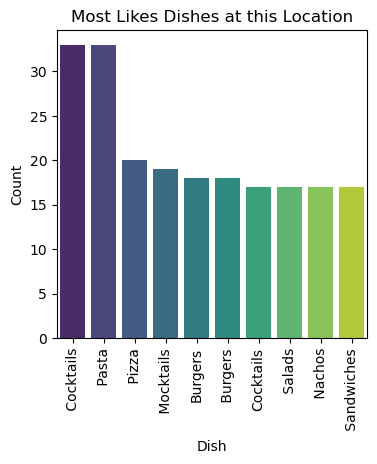

Average cost for two people: ₹893.10
Number of restaurants accepting online orders: 142
Should the food truck business accept online orders? Yes
----------------------------------------------------------------------------
Name of the the location: BTM
Number of restaurants within 1.5 km: 160
Optimal Location: [12.913879256875, 77.60680602625]
Most liked dishes:
                         Dish  Count
35                     Coffee     13
76                    Paratha     11
51                    Biryani     10
56                      Thali     10
1                       Pasta     10
..                        ...    ...
190                 Jal-jeera      1
189                Buttermilk      1
188                  Sea Food      1
187       Vellarikka Pattanam      1
431   Peri Peri Chicken Wings      1

[432 rows x 2 columns]


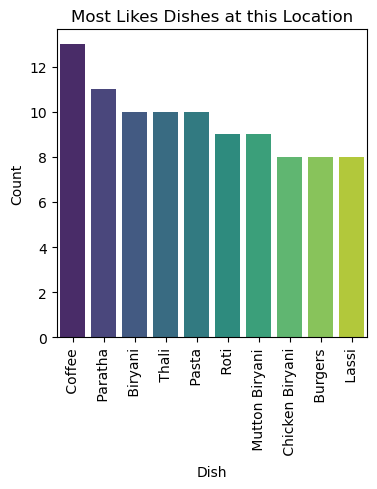

Average cost for two people: ₹531.25
Number of restaurants accepting online orders: 121
Should the food truck business accept online orders? Yes
----------------------------------------------------------------------------
Name of the the location: Brookefield
Number of restaurants within 1.5 km: 94
Optimal Location: [12.969369922340425, 77.71436854787234]
Most liked dishes:
                      Dish  Count
42                  Coffee     10
54                   Pizza     10
23         Chicken Biryani      9
64                 Burgers      7
11                 Biryani      7
..                     ...    ...
143             Ginger Tea      1
145       Rava Masala Dosa      1
146     Chocolate Devotion      1
147     Pomegranate Sorbet      1
299   Chicken Tikka Masala      1

[300 rows x 2 columns]


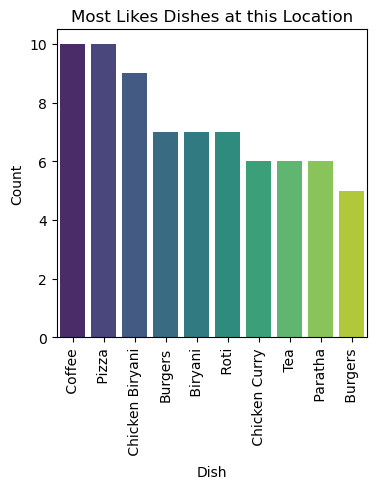

Average cost for two people: ₹685.11
Number of restaurants accepting online orders: 62
Should the food truck business accept online orders? Yes
----------------------------------------------------------------------------
Name of the the location: Bannerghatta Road
Number of restaurants within 1.5 km: 55
Optimal Location: [12.892894150909092, 77.60006479636364]
Most liked dishes:
                   Dish  Count
10        Chicken Curry      6
58              Biryani      5
27                Momos      4
4     Vegetable Biryani      4
8               Biryani      4
..                  ...    ...
80        Sulemani Chai      1
81       Prawn Crackers      1
82              Waffles      1
83        Chole Bhature      1
181   Shitake Mushrooms      1

[182 rows x 2 columns]


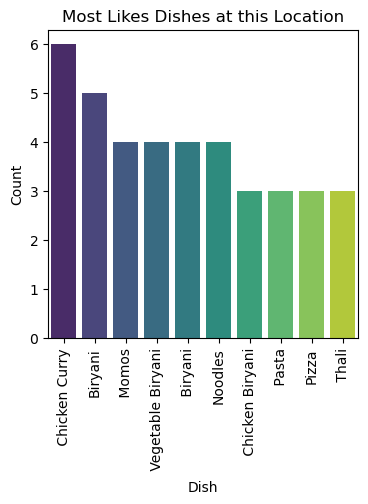

Average cost for two people: ₹595.45
Number of restaurants accepting online orders: 35
Should the food truck business accept online orders? Yes
----------------------------------------------------------------------------
Name of the the location: Indiranagar
Number of restaurants within 1.5 km: 302
Optimal Location: [12.97182820860927, 77.64145853245033]
Most liked dishes:
                  Dish  Count
112              Pasta     30
164              Pizza     26
92           Cocktails     23
231          Mocktails     23
143         Sandwiches     19
..                 ...    ...
384          Spaghetti      1
385   Chocolate Pastry      1
386   Chocolate Sundae      1
388          Bbq Pizza      1
800          Khau Suey      1

[801 rows x 2 columns]


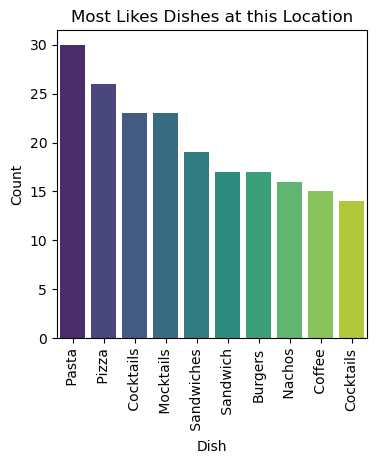

Average cost for two people: ₹724.24
Number of restaurants accepting online orders: 195
Should the food truck business accept online orders? Yes
----------------------------------------------------------------------------
Name of the the location: Bellandur
Number of restaurants within 1.5 km: 43
Optimal Location: [12.927674113953488, 77.67337483488372]
Most liked dishes:
                   Dish  Count
26           Sandwiches      6
45              Paratha      5
21                Lassi      4
6                Salads      4
47          Malai Kofta      3
..                  ...    ...
61        Chicken Satay      1
60    Chicken Shawarama      1
59    Shaadi Ki Biryani      1
58          Butter Naan      1
164        Paneer Pizza      1

[165 rows x 2 columns]


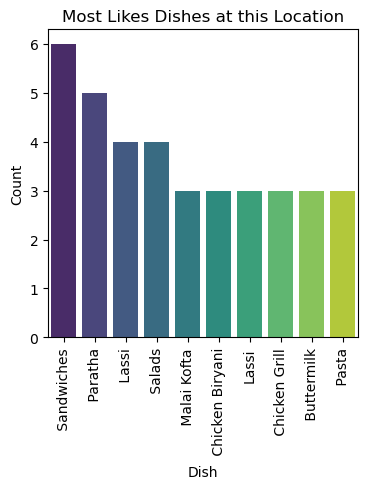

Average cost for two people: ₹580.23
Number of restaurants accepting online orders: 34
Should the food truck business accept online orders? Yes
----------------------------------------------------------------------------
Name of the the location: Malleshwaram
Number of restaurants within 1.5 km: 75
Optimal Location: [13.003885952, 77.57046974]
Most liked dishes:
                Dish  Count
84     Filter Coffee      8
49          Sandwich      7
14           Biryani      6
129            Thali      5
33            Nachos      5
..               ...    ...
119             Beer      1
121     Dragon Prawn      1
122   Chocolava Cake      1
123            Momos      1
263    Chicken Grill      1

[264 rows x 2 columns]


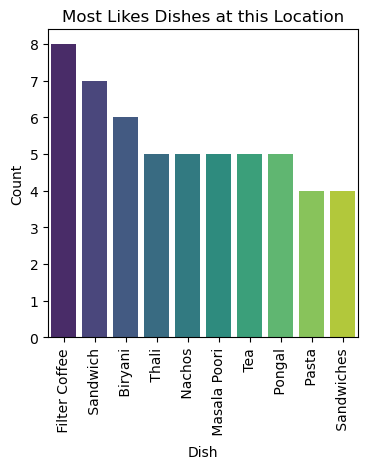

Average cost for two people: ₹533.60
Number of restaurants accepting online orders: 45
Should the food truck business accept online orders? Yes
----------------------------------------------------------------------------
Name of the the location: Banashankari
Number of restaurants within 1.5 km: 32
Optimal Location: [12.926047915625, 77.550146665625]
Most liked dishes:
               Dish  Count
15          Burgers      4
52           Coffee      3
7       Masala Dosa      3
8            Coffee      3
41             Idli      2
..              ...    ...
39        Open Dosa      1
36   Chilli Chicken      1
35    Buffalo Wings      1
33           Salads      1
107      Kaju Barfi      1

[108 rows x 2 columns]


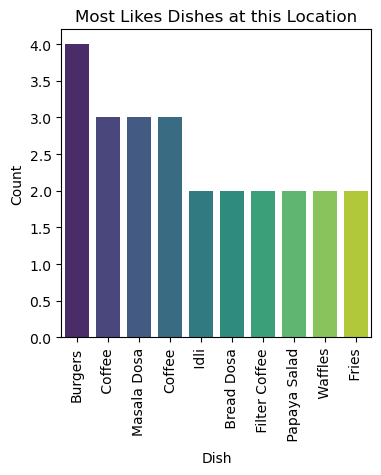

Average cost for two people: ₹465.62
Number of restaurants accepting online orders: 23
Should the food truck business accept online orders? Yes
----------------------------------------------------------------------------
Name of the the location: Kalyan Nagar
Number of restaurants within 1.5 km: 165
Optimal Location: [13.021927375757576, 77.63849246]
Most liked dishes:
                     Dish  Count
28                Burgers     13
65                  Pasta     13
14             Sandwiches     12
39                   Fish     10
11              Mocktails      9
..                    ...    ...
213          Coffee Craze      1
212        Ferrero Rocher      1
210   Chocolate Icecreams      1
208  Ice Cream Strawberry      1
496      Shanghai Chicken      1

[497 rows x 2 columns]


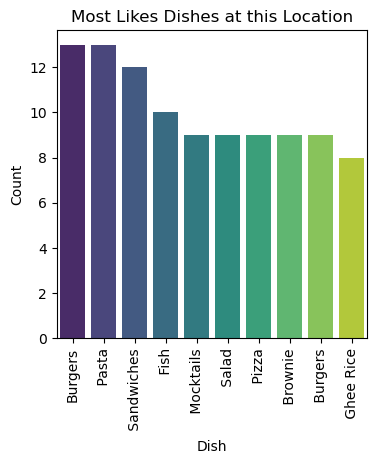

Average cost for two people: ₹666.36
Number of restaurants accepting online orders: 122
Should the food truck business accept online orders? Yes
----------------------------------------------------------------------------
Name of the the location: Electronic City
Number of restaurants within 1.5 km: 24
Optimal Location: [12.8453937625, 77.6726997875]
Most liked dishes:
                    Dish  Count
5                  Pasta      3
18    Hyderabadi Biryani      2
31     Chocolate Fantasy      2
17       Chicken Biryani      2
12                  Fish      2
..                   ...    ...
30   Chocolate Decadence      1
32              Pancakes      1
33        Chocolava Cake      1
1          Chicken Tikka      1
67             Lime Soda      1

[68 rows x 2 columns]


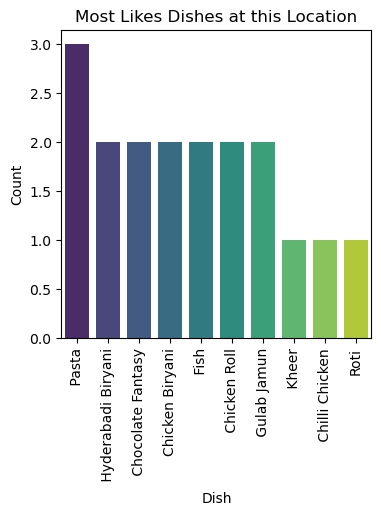

Average cost for two people: ₹618.75
Number of restaurants accepting online orders: 19
Should the food truck business accept online orders? Yes
----------------------------------------------------------------------------


In [309]:
for i, restaurant in enumerate(all_restaurants_within_radius_list):
    # Analyze the most liked dishes in that radius
    dish_liked_series = restaurant['dish_liked'].dropna().str.split(',').explode()
    dish_counts = Counter(dish_liked_series)
    most_liked_dishes = pd.DataFrame(dish_counts.items(), columns=['Dish', 'Count']).sort_values(by='Count', ascending=False)


    # Calculate the average cost for two people in that radius
    restaurant['approx_cost'] = restaurant['approx_cost'].replace('[\$,]', '', regex=True).astype(float)
    average_cost_for_two = restaurant['approx_cost'].mean()

    # Determine how many restaurants accept online orders
    online_order_count = restaurant['online_order'].str.lower().value_counts().get('yes', 0)

    # Assess if the food truck business should accept online orders
    should_accept_online_orders = online_order_count / len(restaurant) > 0.5
    print(f"Name of the the location: {custom_locations[i]['name']}")
    # Print results
    print(f"Number of restaurants within {radius_km} km: {len(restaurant)}")
    print(f"Optimal Location: {optimal_locations[i]}")
    print(f"Most liked dishes:\n{most_liked_dishes}")
    
    # Select the top N restaurants (e.g., top 10)
    top_n = 10
    most_liked_dishes['Count'] = pd.to_numeric(most_liked_dishes['Count'])
    top_dishes = most_liked_dishes.nlargest(top_n,'Count')

    # Create a bar plot
    plt.figure(figsize=(4, 4))
    sns.barplot(x=top_dishes['Dish'], y= top_dishes['Count'], palette='viridis')
    plt.title(f"Most Likes Dishes at this Location")
    plt.xlabel('Dish')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()


    print(f"Average cost for two people: ₹{average_cost_for_two:.2f}")
    print(f"Number of restaurants accepting online orders: {online_order_count}")
    print(f"Should the food truck business accept online orders? {'Yes' if should_accept_online_orders else 'No'}")
    print("----------------------------------------------------------------------------")